In [40]:
import calendar
import numpy as np
import matplotlib.pyplot as plt

In [42]:
def LoadDay(path, year):
    if calendar.isleap(year):
        raw = np.fromfile(path, 'float32').reshape(366, 2, 280, 360)
    else:
        raw = np.fromfile(path, 'float32').reshape(365, 2, 280, 360)
    reverse = raw[:, :, ::-1, :] # day, pr/tmp, lat, lon
    return reverse

def DayToMonth(inputfile, year):
    ind = 0
    month = []
    for mon in range(1, 13):
        cal = calendar.monthrange(year, mon)
        numdays = cal[1]
        monthmean = np.mean(inputfile[ind:ind+numdays,:,:,:], axis=0)
        month.append(monthmean)
        ind += numdays
    month = np.array(month)
    return month

In [45]:
# create arrary: array=[year, month, variable, lat, lon]
save_lst = []
for year in range(1998, 2016):
    """ aphrodite2 contains 18 years daily dataset"""
    path = f"/docker/mnt/d/research/D1/data/aphrodite/V1901_MA_025d/APHRO_MA_025deg_V1901.{year}"
    day = LoadDay(path, year)
    month = DayToMonth(day, year)
    save_lst.append(month)
save_lst = np.array(save_lst)
print(save_lst.shape)

(18, 12, 2, 280, 360)


0.88230354


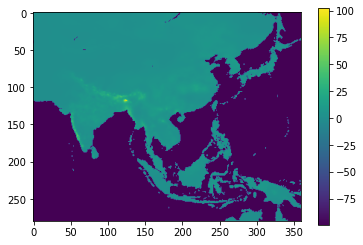

In [69]:
plt.imshow(save_lst[0,6,0,:,:])
plt.colorbar()
print(save_lst[0,6,0,50,100])

In [46]:
def TibetanPlateau():
    """
    280(S15-N55), 360(E60-E150), 1grid=0.25deg
    Tibetan Plateau: N28-N28.7N ,E85-E86
    """
    white = np.zeros((280,360))
    upper_lat = (55-28)*4 - 1 - 3 #N28.75
    lower_lat = (55-28)*4 - 1 #N28
    left_lon = (85-60)*4 -1 #E85
    right_lon = left_lon + 4 #E86
    
    mark = 10**5
    white[upper_lat:lower_lat, left_lon:right_lon] = mark
    print(upper_lat, lower_lat, left_lon, right_lon)
    return white

104 107 99 103


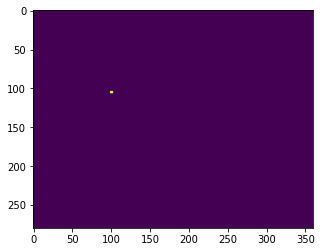

In [47]:
white = TibetanPlateau()
plt.imshow(white)

In [77]:
# Extract and average TibetanPlateau area
# monthly_mean: shape=12, unit: mm/day
ult, llt, lln, rln = 104, 107, 99, 103
monthly_prcp = []
for year in range(18):
    for month in range(12):
        prcp_tp = save_lst[year, month, 0, ult:llt, lln:rln]
        monthly_prcp.append(np.mean(prcp_tp))
monthly_prcp = np.array(monthly_prcp)

In [83]:
monthly_prcp = monthly_prcp.reshape(18,12)
monthly_mean = [np.mean(monthly_prcp[:, i]) for i in range(12)]

Text(0, 0.5, 'Monthly rainfall (mm/day)')

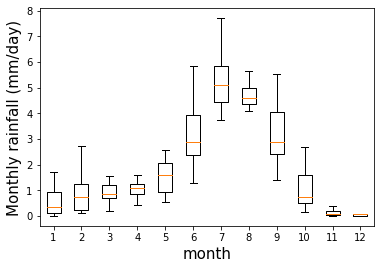

In [89]:
# draw boxplot of precipitation in Tibetan Plateau
fig, ax = plt.subplots()
bp = ax.boxplot(monthly_prcp, sym='')
plt.xlabel('month', fontsize=15)
plt.ylabel('Monthly rainfall (mm/day)', fontsize=15)